Reading: C:\Users\ojhan\OneDrive\Documents\PhysicsProject\13-02-2023\Akrotiri_569218Q0B0024002A.202302130259.npy
Reading: C:\Users\ojhan\OneDrive\Documents\PhysicsProject\13-02-2023\Akrotiri_569218Q0B0024002A.202302130300.npy
Reading: C:\Users\ojhan\OneDrive\Documents\PhysicsProject\13-02-2023\Akrotiri_569218Q0B0024002A.202302131710.npy
Reading: C:\Users\ojhan\OneDrive\Documents\PhysicsProject\13-02-2023\Akrotiri_569218Q0B0024002A.202302131711.npy
Reading: C:\Users\ojhan\OneDrive\Documents\PhysicsProject\13-02-2023\Cabauw_569218Q0B003D003E.202302130259.npy
Reading: C:\Users\ojhan\OneDrive\Documents\PhysicsProject\13-02-2023\Cabauw_569218Q0B003D003E.202302130300.npy
Reading: C:\Users\ojhan\OneDrive\Documents\PhysicsProject\13-02-2023\Cabauw_569218Q0B003D003E.202302131710.npy
Reading: C:\Users\ojhan\OneDrive\Documents\PhysicsProject\13-02-2023\Cabauw_569218Q0B003D003E.202302131711.npy
Reading: C:\Users\ojhan\OneDrive\Documents\PhysicsProject\13-02-2023\Camborne_569218Q0B0025002A.20230213

<ipython-input-5-8f2bdd3d9632>:173: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=0).
  axs[1].specgram(filtered_samples, Fs=1/9.142e-6)#,vmin=-100, vmax=0)
C:\Users\ojhan\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


Saving figure: Spectograms\2023-02-13T025917\Gibraltar.png


C:\Users\ojhan\anaconda3\lib\site-packages\matplotlib\image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
C:\Users\ojhan\anaconda3\lib\site-packages\matplotlib\image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\Users\ojhan\anaconda3\lib\site-packages\matplotlib\image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
C:\Users\ojhan\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


Saving figure: Spectograms\2023-02-13T025917\Lerwick.png
Saving figure: Spectograms\2023-02-13T025917\Tartu.png


<ipython-input-5-8f2bdd3d9632>:173: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=0).
  axs[1].specgram(filtered_samples, Fs=1/9.142e-6)#,vmin=-100, vmax=0)
C:\Users\ojhan\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


Saving figure: Spectograms\2023-02-13T025917\Valentia.png


C:\Users\ojhan\anaconda3\lib\site-packages\matplotlib\image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
C:\Users\ojhan\anaconda3\lib\site-packages\matplotlib\image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\Users\ojhan\anaconda3\lib\site-packages\matplotlib\image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
C:\Users\ojhan\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


Saving figure: Spectograms\2023-02-13T025917\Watnall.png
Seconds 2 run: 20 seconds


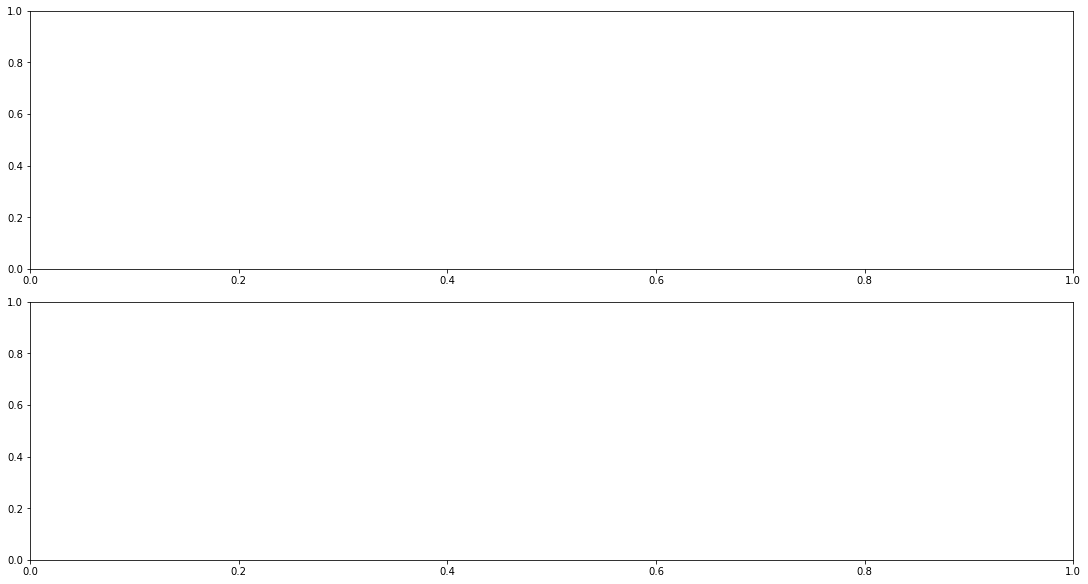

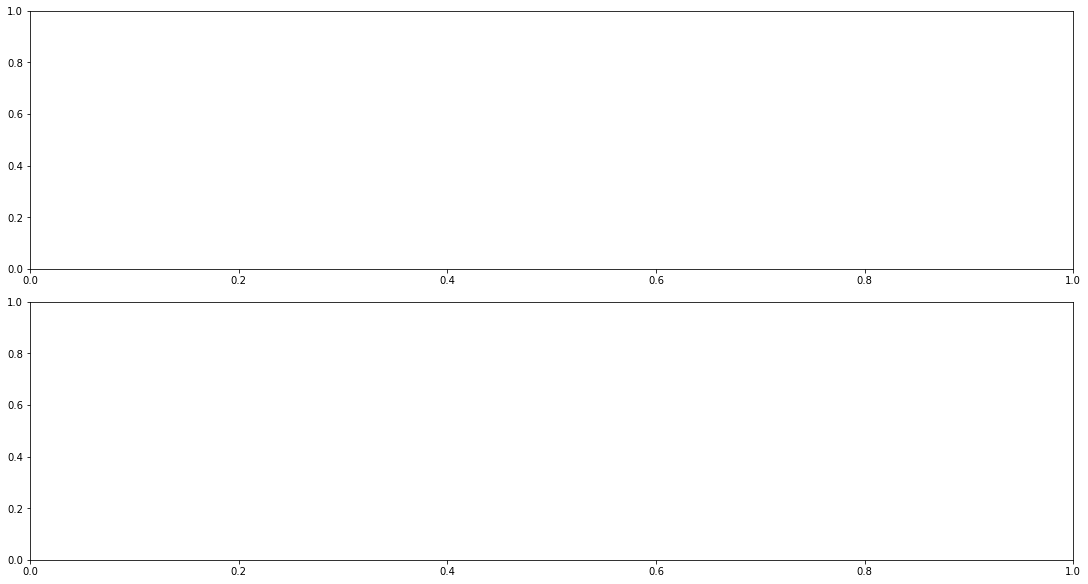

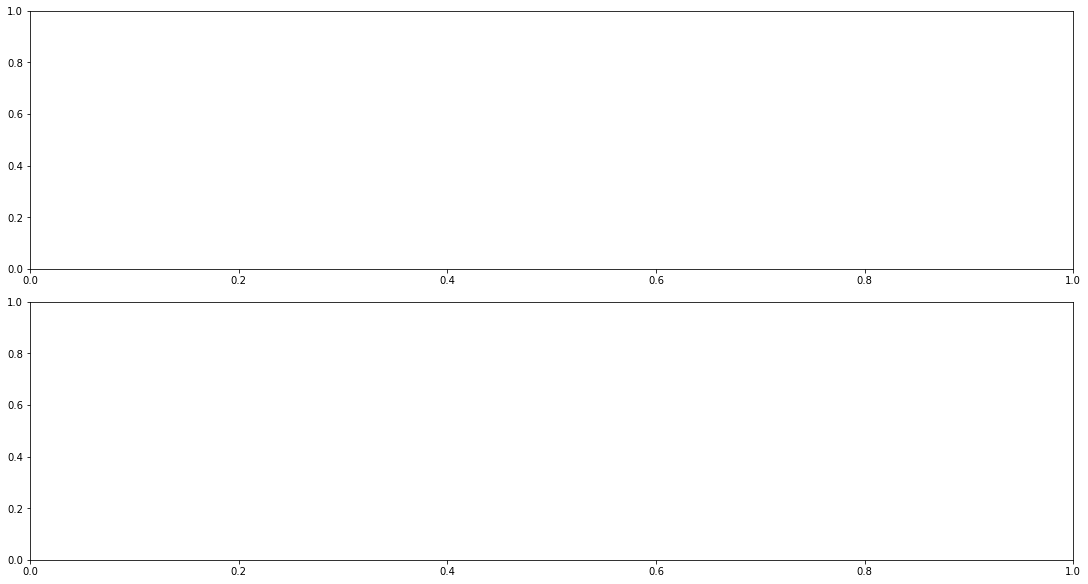

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants, optimize, signal
from pyproj import Geod
from scipy.optimize import minimize
import os
import glob

def filter_t_series(t, samples, sos, thresh=np.timedelta64(20000, "ns")):
    """
    Filters time series accounting for discontinuities

    Parameters
    ----------
    t : np.array of np.datetime64
        time array
    samples : np.array of float
        samples
    sos : filter object
        sso filter object
    thresh : np.timedelta64, optional
        The minimal time gap needed for a discontinuity.
        The default is np.timedelta64(20000, "ns").

    Returns
    -------
    np.array float
        filtered array.

    """
    if len(t) > 0:
        dt = np.diff(t)
        new_samples = []
        current_idx = 0
        l1 = np.where(dt > thresh)[0]
        l1 = np.hstack((l1, len(samples) - 1))
        l1 += 1
    
        for end_idx in l1:
            new_sample_tmp = signal.sosfilt(sos,
                                            samples[current_idx:end_idx])
    
            current_idx = end_idx
    
            new_samples += list(new_sample_tmp)
    
        return new_samples
    else:
        return []


def atddict(long, lat, ref):
    '''
   Finds the Arrival Time Difference between a reference node and each other node
    based on an inputted longitude and latitude of a meteorite. Returns a dictionary
    with Site as key and ATD as value.
    '''
    
    #start atd dictionary
    atd = {}
    
    #define the speed of light in m/s (can change if we find it is different)
    c = 299792458
    
    # Loop between each node in node_config
    for node in node_config:
        geod = Geod(ellps='WGS84')
        
        # Use the geod function to find the dist to the for the node
        _, _, dist = geod.inv(node_config[node]['Position']['lon'], node_config[node]['Position']['lat'], long, lat)

        # Use the geod function to find the dist to the reference node
        _, _, ref_dist = geod.inv(node_config[ref]['Position']['lon'], node_config[ref]['Position']['lat'], long, lat)

        # Calculate the time difference
        timediff = (dist / c) - (ref_dist / c)

        # Add the ATD to the ATD dictionary in ns
        atd[node_config[node]['Site']] = np.timedelta64(int(timediff * 1e9),'ns')
        
        
    return atd

# Load the node config dictionary this contains information about the nodes
# (receivers) position and name
prog_start = np.datetime64("now")
node_config = np.load("node_config_fixed.npy", allow_pickle=True).item()
node_code = {}
datadict = {key: {"time": [],
                  "waveform": []} for key in node_config}
# LEELA sampling dt
dt = np.timedelta64(int(1e9 / 109375), "ns")
t = np.arange(0, 1024, 1) * dt

# Set parameter atds to be a dictionary with Watnall as the reference node
atds = atddict(-2.29,53.28,'569218Q0B001D0029')
window_dt = np.timedelta64(1000, "ms")
start_time = np.datetime64("2023-02-13T02:59:17")
end_time = np.datetime64("2023-02-13T02:59:18")

# Create filter here so only processed once:
lower_f = 5000
upper_f = 15000
sos = signal.butter(6, [lower_f,upper_f], 'bp', fs=1/9142e-9, output='sos')

for key in node_config.keys():

    # File path to data files (if have hard drive then: /Volumes/WD_ITP/Bath_VLF_2023_decoded)
    folder_path = "C:\\Users\\ojhan\\OneDrive\\Documents\\PhysicsProject\\13-02-2023\\"

    file_list = glob.glob(folder_path + "*" + key + '*20230213*')

    # Code to create a list of all the data for each of the files
    for file_path in file_list:
        print("Reading: " + file_path)
        chunks = np.load(file_path, allow_pickle=True).item()
        for chunk in chunks:
            datadict[key]["time"].append(chunks[chunk]["starttime"])
            datadict[key]["waveform"].append(chunks[chunk]["wvfmdata"])

print("data loaded")

study_times = np.arange(start_time, end_time, window_dt)
print(study_times)
# Create figure
for study_time in study_times:
    study_time_end = study_time + window_dt

    print("Processing: " + study_time.astype(str))
    for site in datadict:
        
        fig, axs = plt.subplots(2,
                        figsize=(15, 8),
                        sharex=False,
                        constrained_layout=True)
        if (node_config[site]["Site"] != 'Dunkeswell') and \
                (node_config[site]["Site"] != 'Payerne') and \
                (node_config[site]["Site"] != 'Keflavik') and \
                (node_config[site]["Site"] != 'Herstmonceux'):

            datadict[site]["time"] = np.array(datadict[site]["time"],
                                              dtype=np.datetime64)
            l1 = np.where((datadict[site]["time"] >= study_time) &
                          (datadict[site]["time"] <= study_time_end))[0]

            samples = np.array([])
            time = np.array([], dtype=np.datetime64)

            for i in l1:
                samples = np.hstack((samples, datadict[site]["waveform"][i]))
                time = np.hstack((time, datadict[site]["time"][i] + t))

            filtered_samples = np.array(filter_t_series(time,
                                                        samples,
                                                        sos))

            # Plot the time_inc_atd against cleaned_waveform
            # You'll need to double check if this next line should be
            # time + atds or time - atds
            axs[0].plot(time - atds[node_config[site]["Site"]],
                         filtered_samples)
            axs[0].set_title(node_config[site]["Site"])

            # Set x and y limits to zoom in
            axs[0].set_xlim(study_time, study_time_end)
            axs[0].grid()
            if len(filtered_samples) > 0:
                axs[0].set_ylim(25 + np.max(filtered_samples),
                                 np.min(filtered_samples) - 25)
           
            
            # spectogram making
            axs[1].specgram(filtered_samples, Fs=1/9.142e-6)#,vmin=-100, vmax=0)
            axs[1].set_title('Spectrogram - ' + str(node_config[site]['Site']))
            cbar = fig.colorbar(spec[3], ax=axs[1])
            cbar.set_label('Intensity')
            axs[1].set_xlabel('Time')
            axs[1].set_ylabel("Frequency")
            axs[1].set_ylim(0,50000)            

            # Save the figure
            # Convert study_time to a windows happy filename (i.e no :)
            filename_stub = str(node_config[site]['Site']).replace(":", "")
            filename_stub = filename_stub.replace(".", "_")
            #start_datetime = start_time.astype(datetime.datetime)
            start_time_stub = str(start_time).replace(":", "")
            start_time_stub = start_time_stub.replace(".", "_")
            

            directory = "Spectograms\\" + start_time_stub  # Specify your desired folder path
            os.makedirs(directory, exist_ok=True)
            
            save_as = "Spectograms\\" + start_time_stub + "\\" + filename_stub + ".png"
            print("Saving figure: " + save_as)
            fig.savefig(save_as)
            
            plt.close(fig)

    
prog_end = np.datetime64("now")
print("Seconds 2 run: " + (prog_end - prog_start).astype(str))


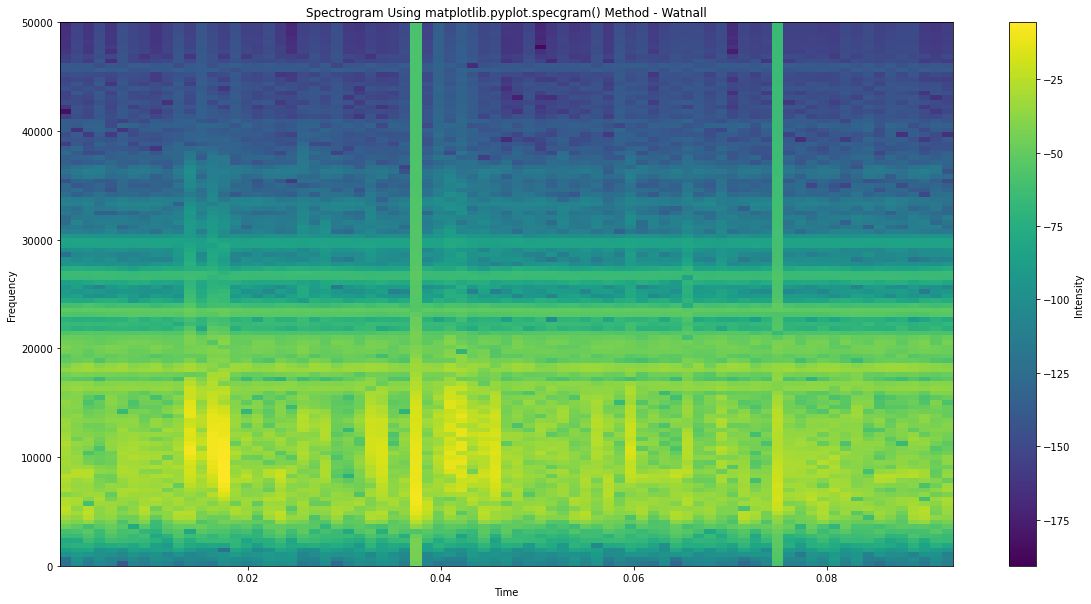

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.signal import savgol_filter

#smoothed_samples = savgol_filter(filtered_samples,window_length=15,polyorder=2)
 
# Matplotlib.pyplot.specgram() function to
# generate spectrogram
fig,ax = plt.subplots(figsize=(20,10))
spec = ax.specgram(filtered_samples, Fs=1/9.142e-6)#,vmin=-100, vmax=0)

 
# Set the title of the plot, xlabel and ylabel
# and display using show() function
plt.title('Spectrogram Using matplotlib.pyplot.specgram() Method - ' + str(node_config['569218Q0B001D0029']['Site']))
cbar = fig.colorbar(spec[3], ax=ax)

# Set colorbar label
cbar.set_label('Intensity')
ax.set_xlabel('Time')
ax.set_ylabel("Frequency")
ax.set_ylim(0,50000)
plt.show()